1. Importing all required lib
2. Reading raw data file and data cleaning
  - check for null value
  - check unique value in each column 
  - checking data type
  - Renaming few columns for better understanding and recaling feature name 
  - Dropping redundent columns
  - check data size 

3. Checking any outlier , as all max and min value of continues variable lie between (mean +- 3*std)  , eleminate posibility of outlier  

4. EDA : Exploratory data Analysis  and Inference 
5. Encoding/mapping the catagorical column
6.Dummy data creation for catagorical variable
7. Data prepdation for model input 
  - Split dat into train and test
  - Data scaling with min max on continues variable

8. Feature engineering
    - Recursive feature elimination  for feature selection
    - Ordinary least squares model building 
    - Calculate VIF 
    - Remove feature based on P value and VIF for model tuning 
9.Check for co-efficent agaist each feature
10.Residual Analysis
	  - Checking Homoscedasticity with train data result
	  - R2 and Adjested_R2
11. Predictions of test variable Using the developed Model
	  - scaling Min Max test data
	  - Preparing input for model 
	  - predicting target variable 
	  - Checking Homoscedasticity with test result
  - y_test and y_pred spread
12. Result accuracy prediction
  - Calculation of R2_test and Adj_R2_test for test result



In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import warnings
warnings.filterwarnings(action="ignore")

In [50]:
# importing required libreries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading raw data file and data cleaning 

In [51]:
#reading raw file
Bike=pd.read_csv("/content/drive/MyDrive/upgrad/Linear Regression/Bike project/day.csv")

Bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [52]:
# check for null value
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
#check unique value in each column
Bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [54]:
# check data type 
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [55]:
# renaming few columns for better understanding and recaling feature name 

Bike.rename(columns={'mnth':'month','hum':'humidity'}, inplace=True)


In [56]:
#Dropping redundent columns
#copy DataFrame ,to let orignal data as it is 
data=Bike.drop(['instant',"casual","registered","dteday"], axis=1 )

In [57]:
# checking the shape of new dataframe
data.shape

(730, 12)

In [58]:
#checking any outlier , as all max and min value of continues variable lie between (mean +- 3*std)  , eleminate posibility of outlier  
data.describe()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


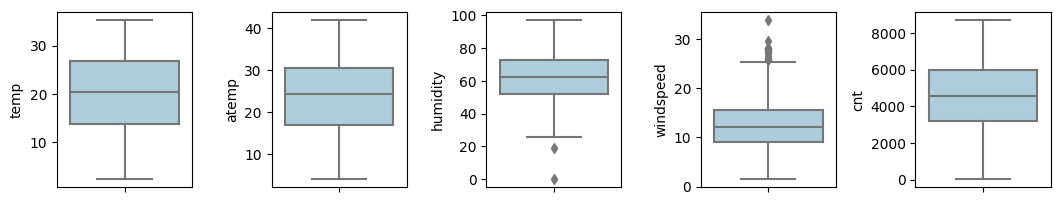

In [59]:

#filtering continuous variable "Cont_var"
Cont_var=["temp","atemp","humidity","windspeed",	"cnt"]
#checking outlier in continuous variable
plt.figure(figsize=(15,10))
for i in enumerate(Cont_var):    
   plt.subplot(5,7,i[0]+1)    
   sns.boxplot(y=i[1],data=data,palette="Paired")
   plt.tight_layout() 

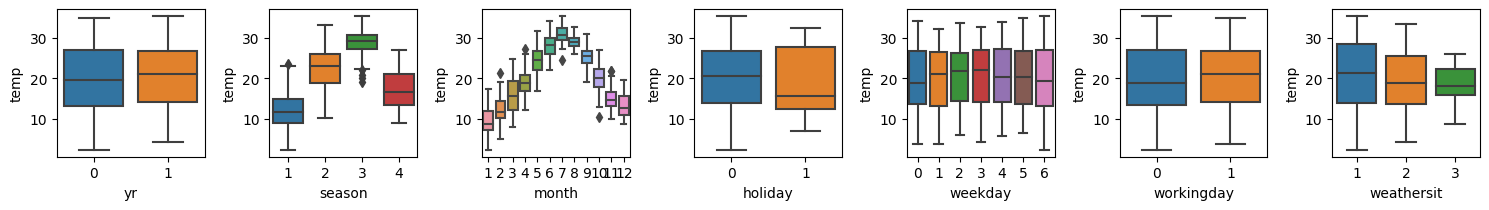

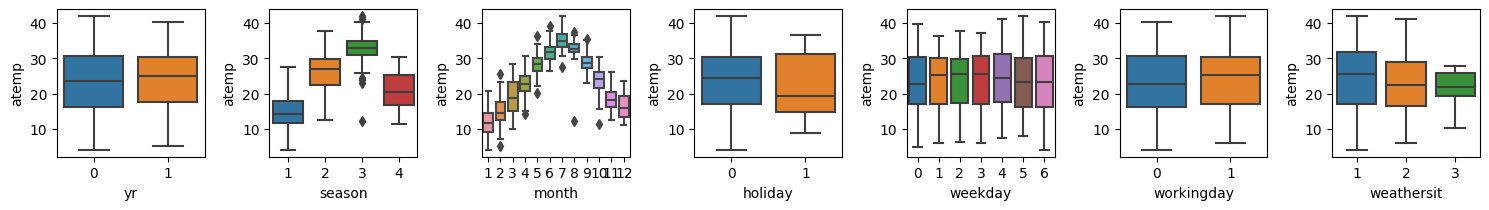

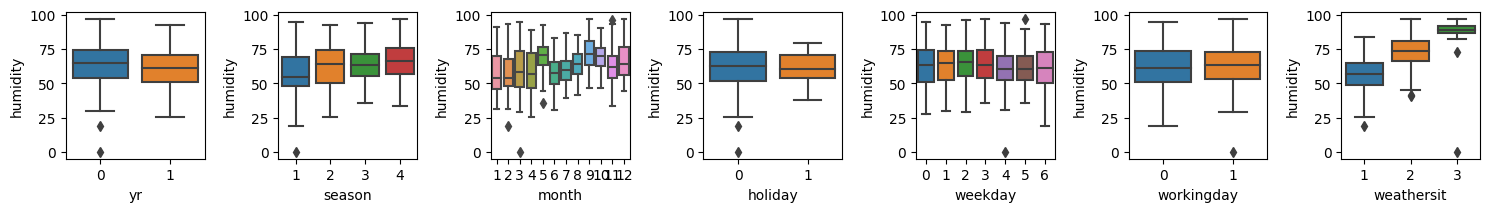

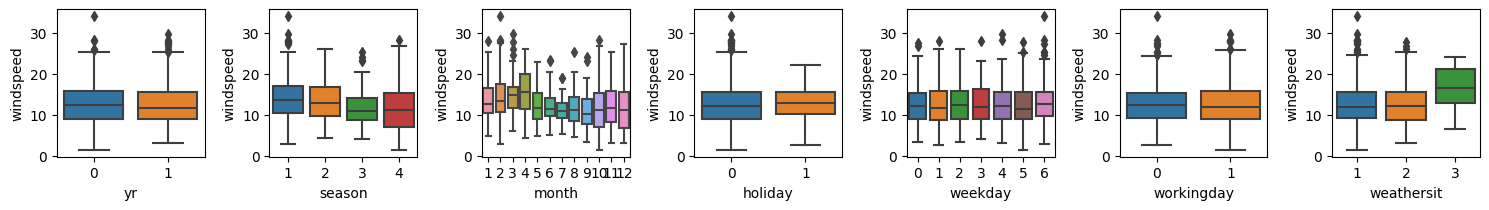

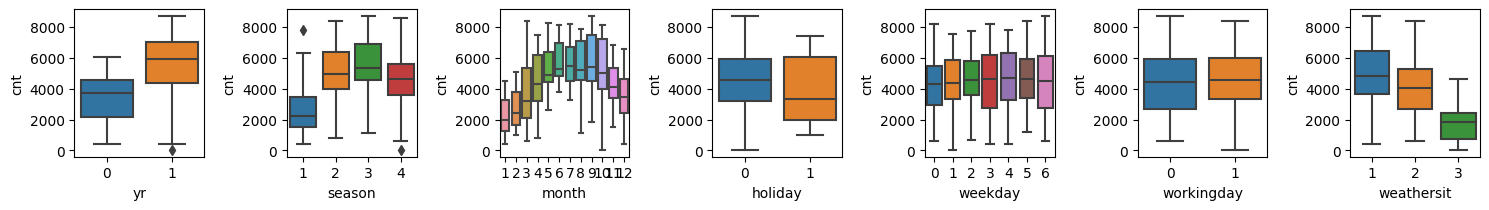

In [60]:

#filtering cat variable in "cat_var"
# checking relation between catagorical varible with continous varible with Box plot
cat_var=["yr","season","month","holiday","weekday","workingday","weathersit"]
for j in  Cont_var:
  plt.figure(figsize=(15,10))
  for i in enumerate(cat_var):    
    plt.subplot(5,7,i[0]+1)    
    sns.boxplot(y=j,x=i[1],data=data)
    plt.tight_layout() 

1. Season 3has highest demand.
2. demand next year is up
3. Year start and end has low demand and mid month has high demand
4. The clear weathershit got good correlation


In [61]:
# Encoding/mapping the season column
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

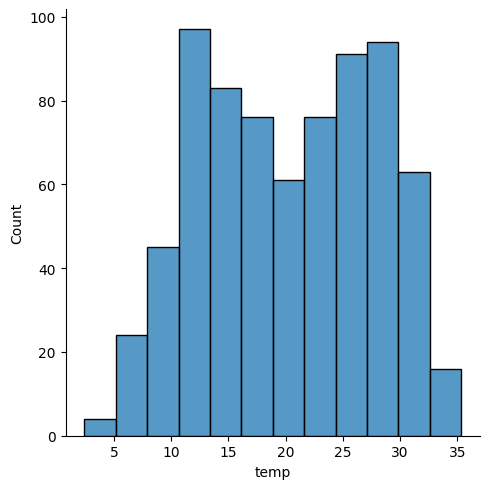

1


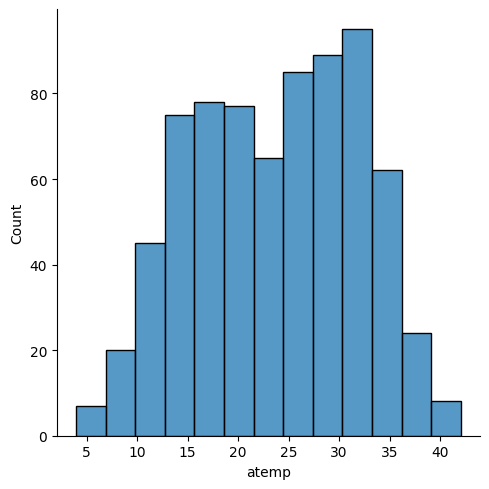

2


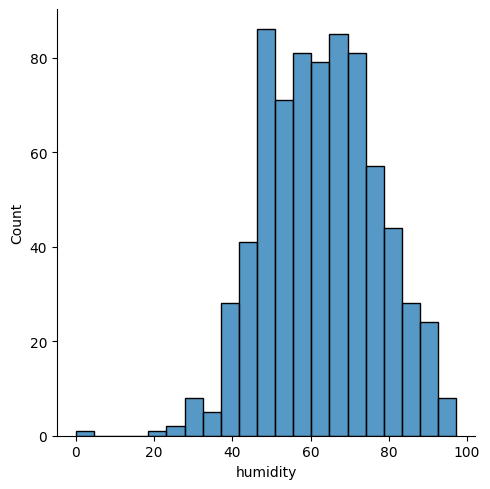

3


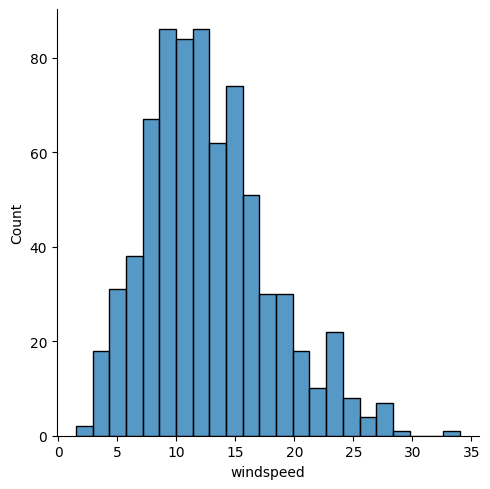

4


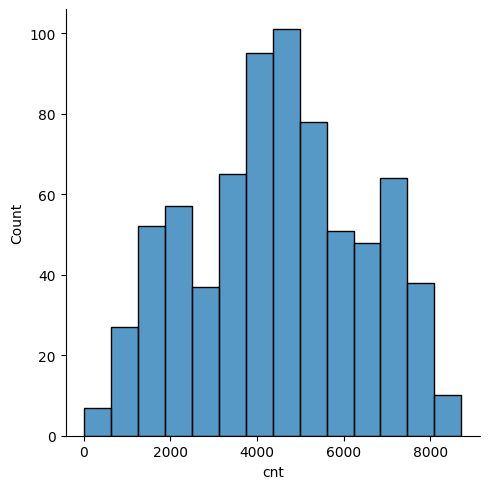

5


In [62]:
#Checking normal disntribution on continous variables

j=1
for i in Cont_var:
  sns.displot(data, x=i)
  plt.show()
  print(j)
  j=j+1



<Figure size 1500x1500 with 0 Axes>

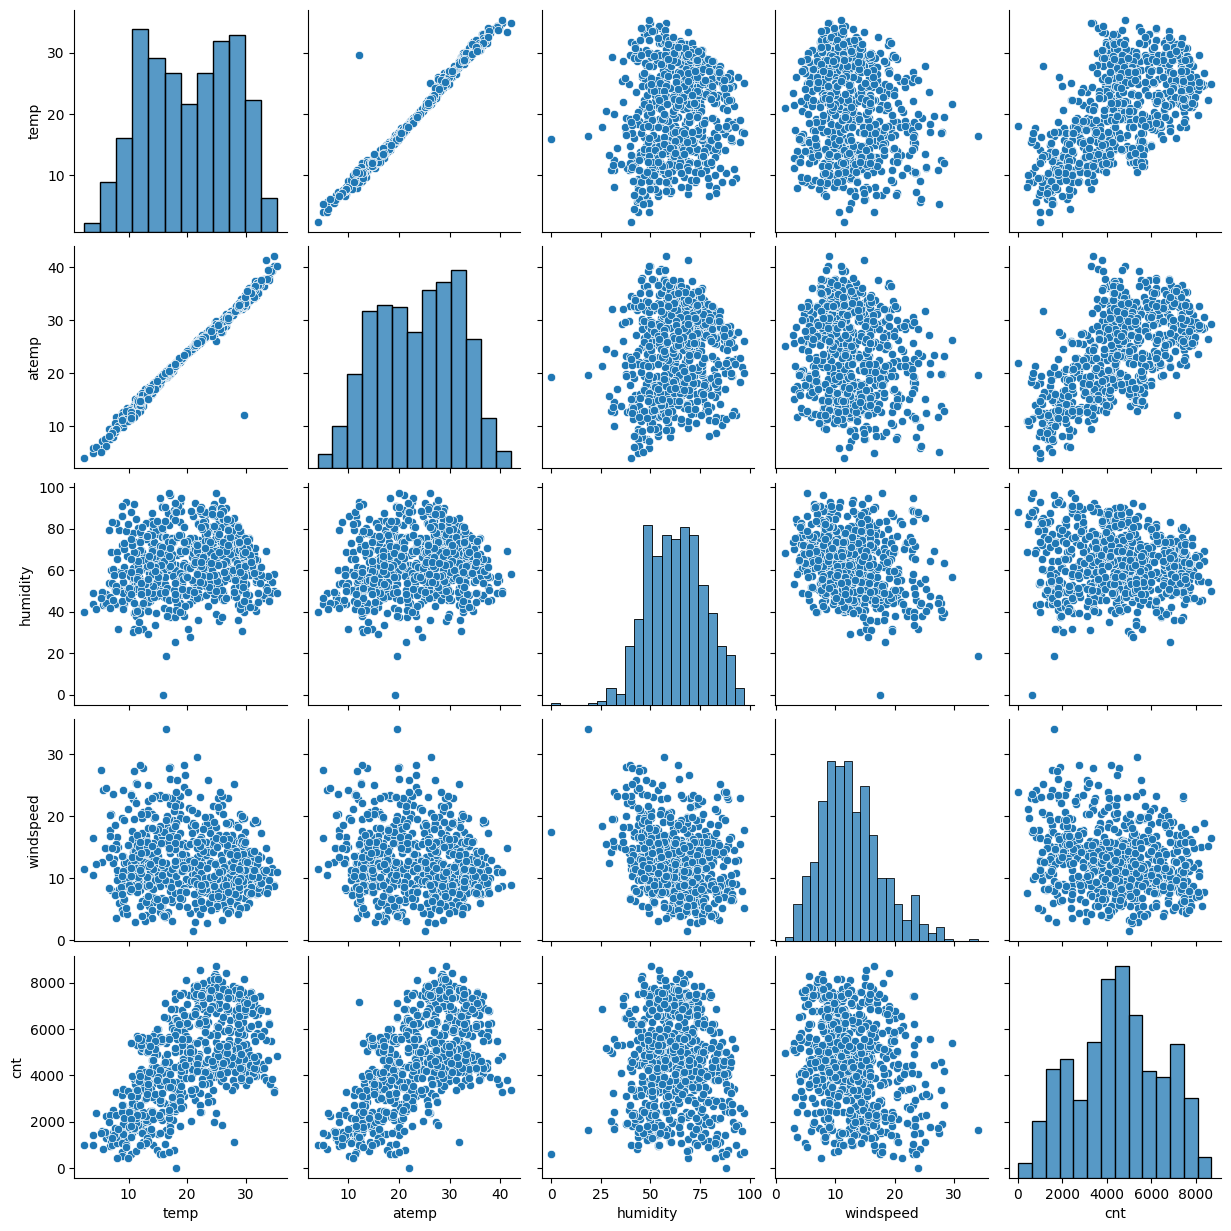

In [63]:
# checking correlation through relational plot
plt.figure(figsize=(15,15))
sns.pairplot(data[Cont_var])
plt.show()

 temp and atemp has the highest corelation . Both of the parameters cannot be use

We will check VIF and p-value w.r.t other variables, to decided which one need to drop.

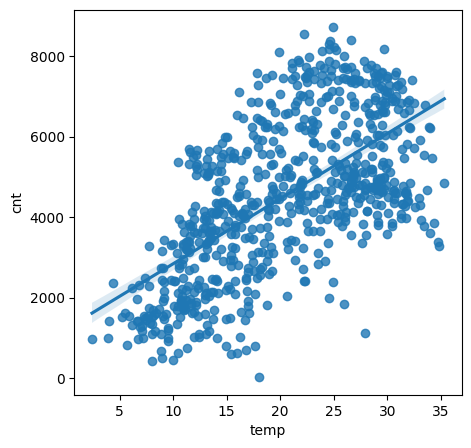

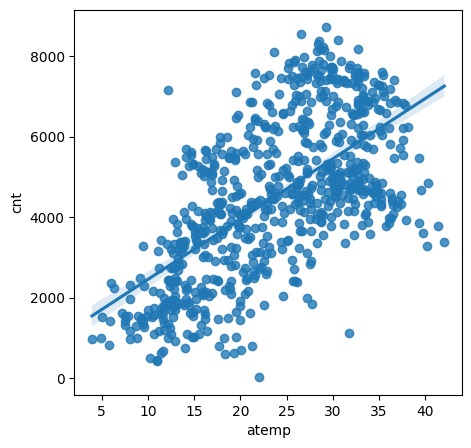

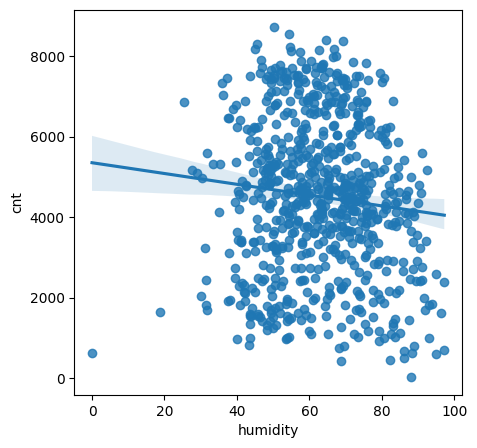

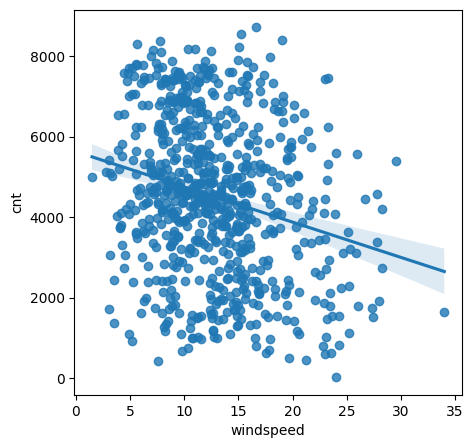

In [64]:
j=1

for i in range(4):  
  plt.figure(figsize=(5,5))  
  sns.regplot(data=data[Cont_var],y="cnt",x=data[Cont_var].columns[i])
  plt.xlabel(data[Cont_var].columns[i])
  plt.show()

#Inference:
Demand for bikes is positively correlated to temp.


Although we can see cnt decreasing with increase in humidity.


cnt decreasing with increase in windspeed.

<Axes: >

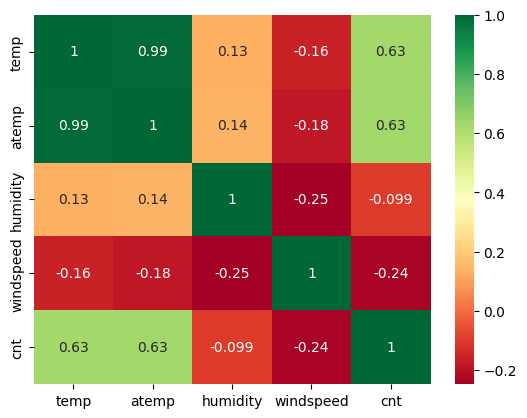

In [65]:
# checking correlation between continous variable 
corelation=data[Cont_var].corr().sort_values("cnt",ascending=False)

sns.heatmap(data[Cont_var].corr(), annot = True, cmap="RdYlGn")

#Data Preparation

In [66]:

# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data.month,drop_first=True)

weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data.season,drop_first=True)

# Merging  the dataframe, with the dummy variable dataset. 
data = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

# dropping columns after ceating dummy variable  
data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)



## Splitting data 

In [67]:
# split data in to train and test
x_train,x_test=train_test_split(data,train_size=0.7,random_state=100)
x_train.shape,x_test.shape


((510, 30), (220, 30))

In [68]:
# data scaling with min max 
#Use Normalized scaler to scale
scaler = MinMaxScaler()
x_train[Cont_var] = scaler.fit_transform(x_train[Cont_var])
x_train[Cont_var]


,temp,atemp,humidity,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095
...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0.832835
53,0.202618,0.218747,0.435939,0.111379,0.218017
350,0.248216,0.223544,0.577930,0.431816,0.312586
79,0.462664,0.434043,0.759870,0.529881,0.236424


<Axes: >

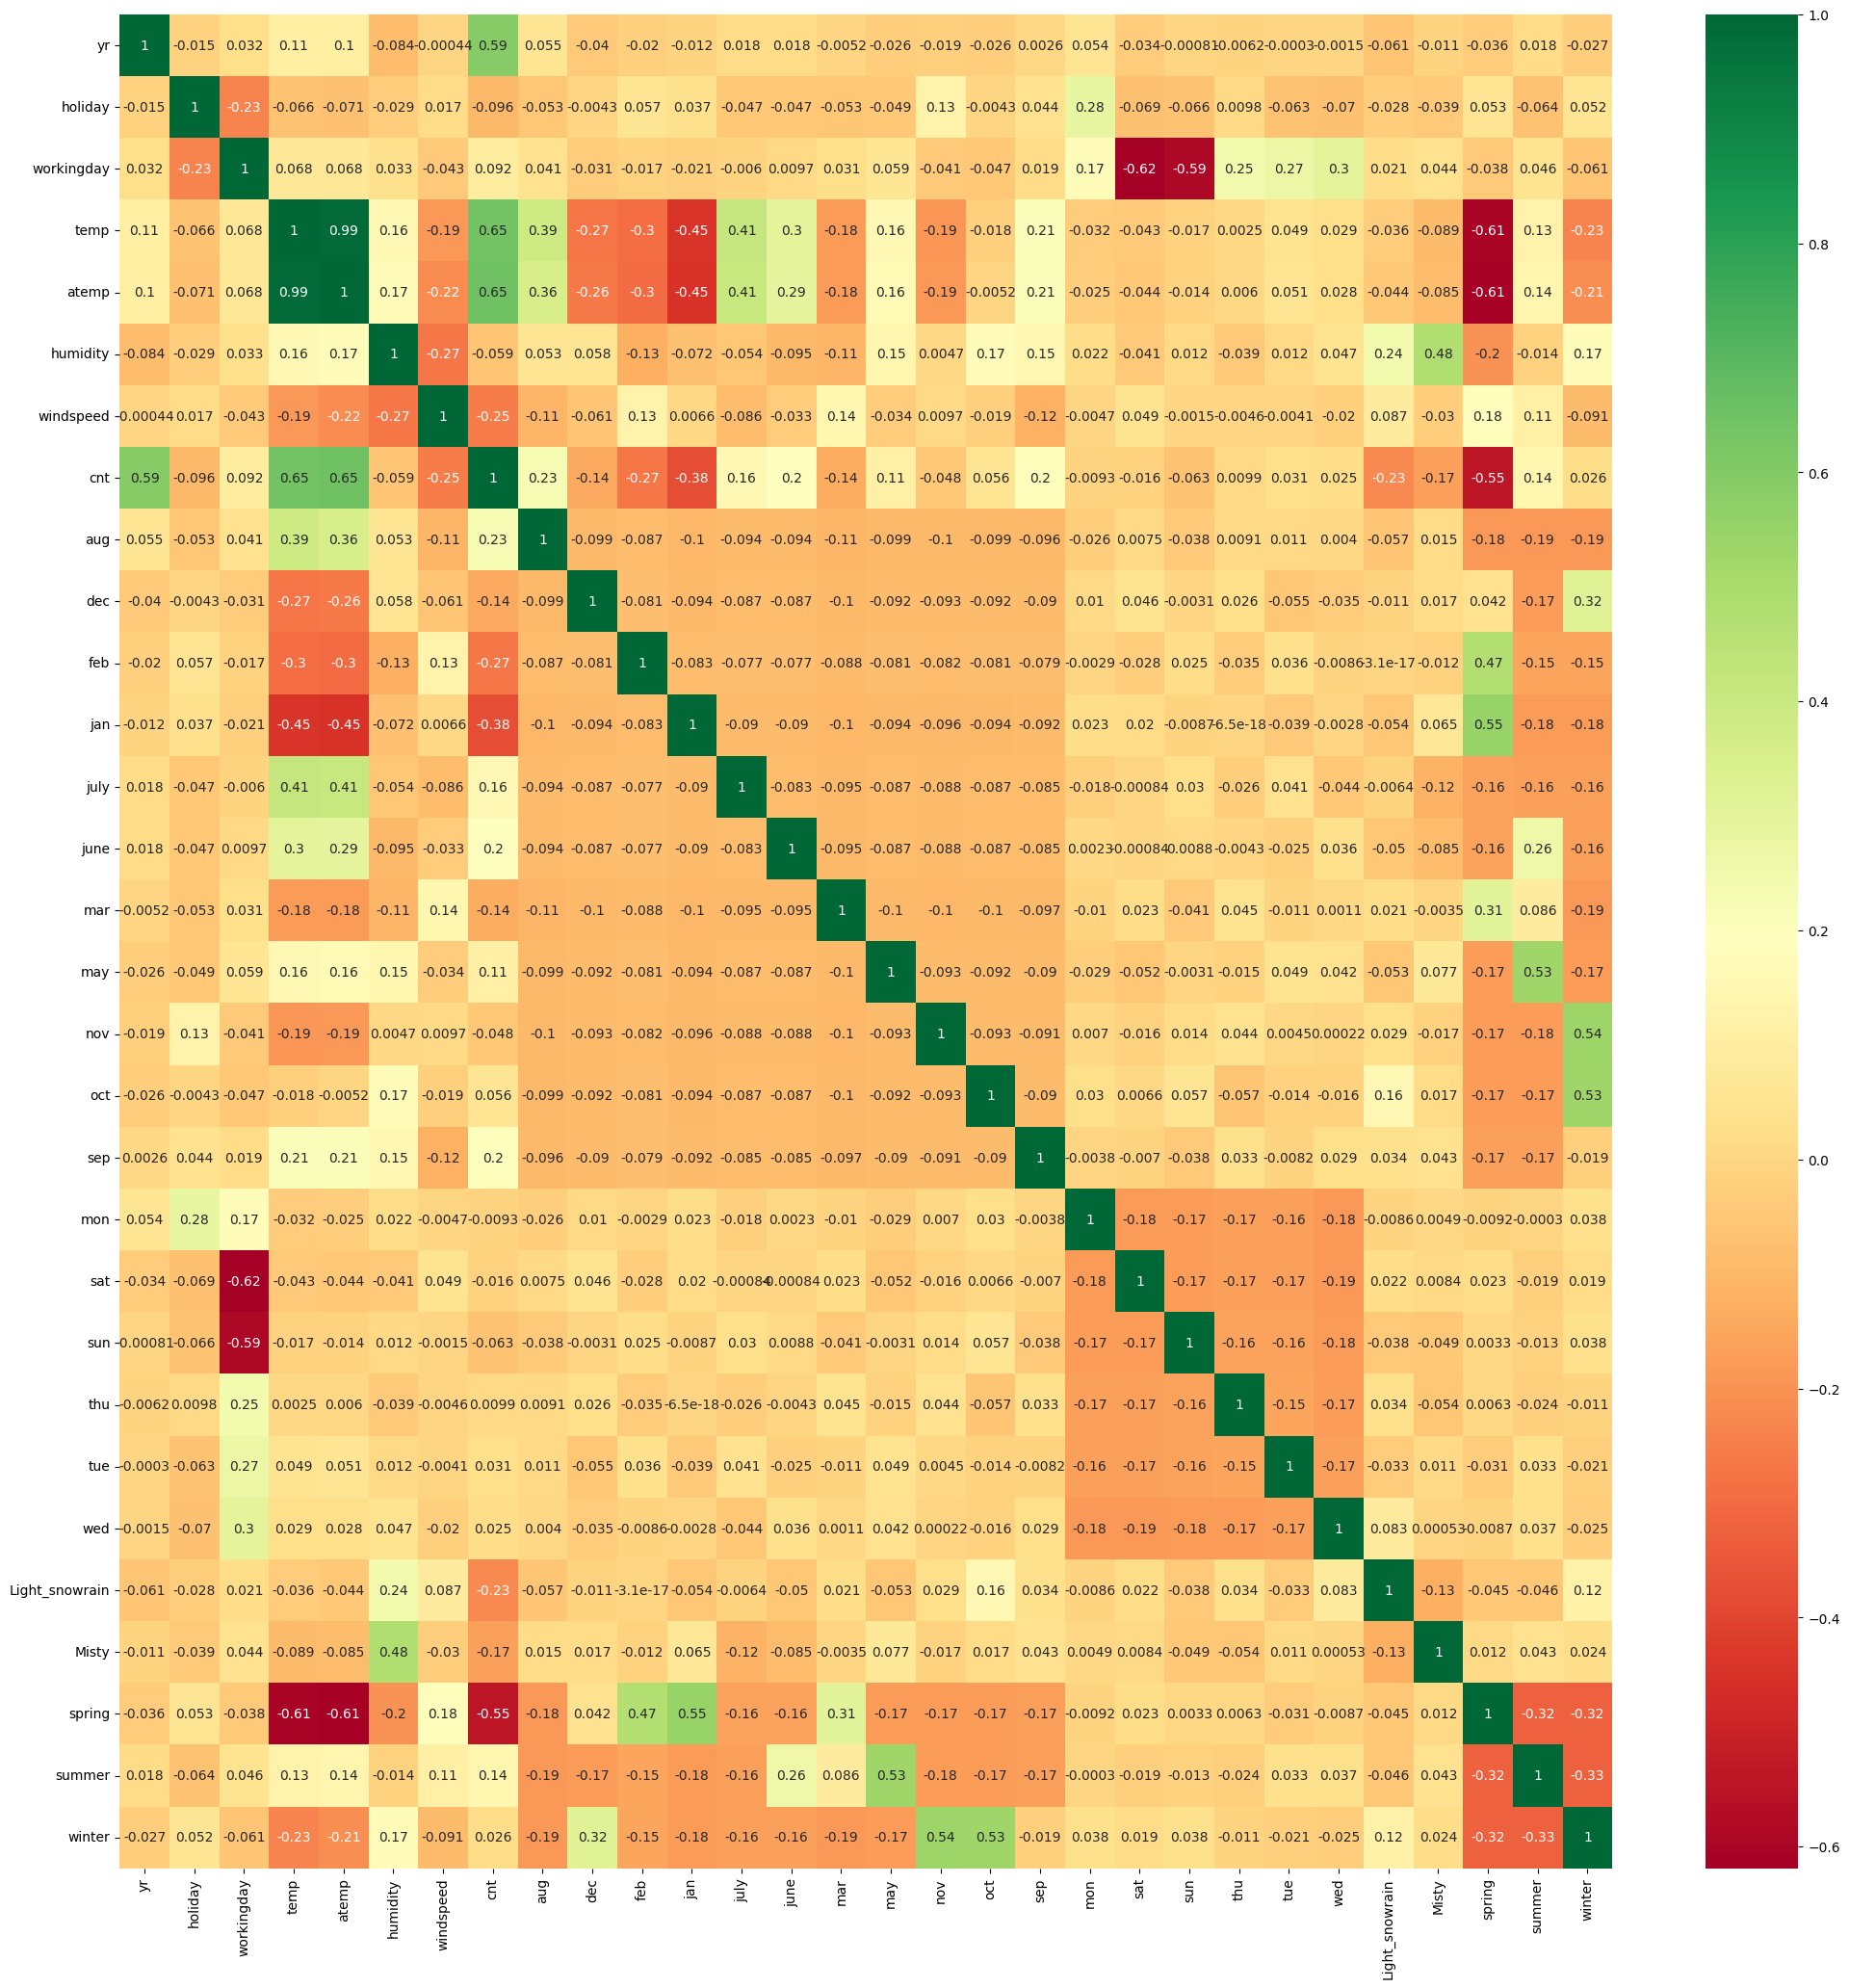

In [69]:
#heatmap to check correlation among all feature 
plt.figure(figsize = (25,25))
sns.heatmap(x_train.corr(), annot = True, cmap="RdYlGn")

In [70]:
# dependent variable split
y_train = x_train.pop('cnt')
X_train = x_train


In [71]:
# Recursive feature elimination 
# Using LinearRegression  for RFE
LRM = LinearRegression()
LRM_FIT=LRM.fit(X_train,y_train)
rfe = RFE(LRM, n_features_to_select=15)
RFE_fit = rfe.fit(X_train, y_train)
list(zip(X_train.columns,RFE_fit.support_,RFE_fit.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [72]:
# filter feature based on RFE model 
col=list(X_train.columns[rfe.support_])
X_train_rfe=X_train[col]

In [73]:
#model building  statsmodel OLS 
def statsmodel (df):
  X_train_sm=sm.add_constant(df)
  # create model object
  lr=sm.OLS(y_train,X_train_sm)
  # fit model and check parameters 
  LR_model=lr.fit()
  return LR_model.summary() , LR_model

summary , model = statsmodel(X_train_rfe)

In [74]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.22e-191
Time:                        19:57:49   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
yr                 0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
humidity          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                0.0814      0.016      4.945      0.000       0.049       0.114
sat                0.0536      0.014      3.694      0.000       0.025       0.082
Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# function to calculate VIF 
def vif(df):
  vif = pd.DataFrame()
  X = df
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return  vif

vif(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


## VIF is very high for "humidity" , will drop if first and train model again

In [76]:

X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

## Again checking VIF and P value 
summary , model = statsmodel(X_train_rfe)
vif(X_train_rfe) ,summary

(          Features   VIF
 3             temp  7.07
 2       workingday  5.24
 4        windspeed  4.68
 11          spring  3.07
 12          summer  2.34
 0               yr  2.08
 13          winter  1.98
 8              sat  1.97
 5              jan  1.62
 6             july  1.59
 10           Misty  1.58
 7              sep  1.35
 1          holiday  1.17
 9   Light_snowrain  1.09,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.843
 Model:                            OLS   Adj. R-squared:                  0.838
 Method:                 Least Squares   F-statistic:                     189.6
 Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.60e-188
 Time:                        19:57:49   Log-Likelihood:                 510.75
 No. Observations:                 510   AIC:                            -991.5

In [77]:
X_train_rfe

,yr,holiday,workingday,temp,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.431816,0,0,0,1,0,1,0,0,1
79,0,0,1,0.462664,0.529881,0,0,0,0,0,1,0,1,0


#Model seems tune enogh , as no high P value and no abnormal VIF 

## Check for co-efficent agaist each feature

In [78]:
model.params

const             0.173669
yr                0.234461
holiday          -0.055784
workingday        0.046359
temp              0.472207
windspeed        -0.156254
jan              -0.039197
july             -0.047871
sep               0.075470
sat               0.058305
Light_snowrain   -0.290800
Misty            -0.081261
spring           -0.059888
summer            0.044507
winter            0.078366
dtype: float64

## Residual Analysis 

In [79]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
Y_predict=model.predict(X_train_rfe_sm)


<function matplotlib.pyplot.show(close=None, block=None)>

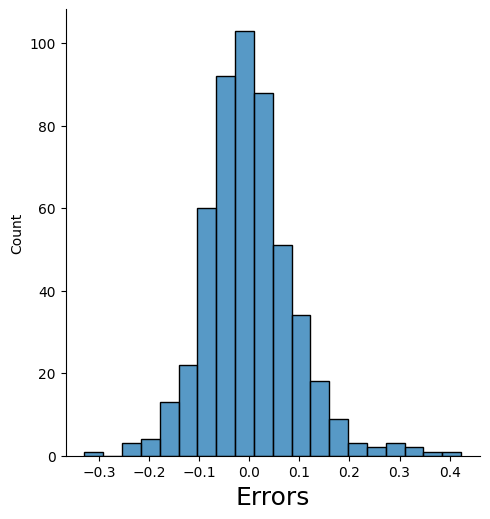

In [80]:
# to check if error is normally distributed 
sns.displot(Y_predict-y_train,bins = 20)
plt.xlabel('Errors', fontsize = 18)   
plt.show

# Checking Homoscedasticity with train data result 

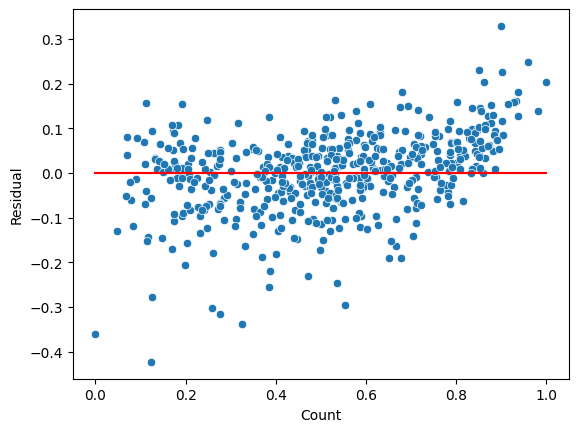

In [81]:
# residual based Homoscedasticity check
residual=y_train-Y_predict
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


##  Error is not evenly distributed at extreem right

In [82]:
## Accuracy check with R2 and Adjested R2

r2 = r2_score(y_train, Y_predict)
Adjusted_R2 = 1-((1-r2)*(len(y_train)-1))/(len(y_train)-X_train_rfe.shape[1]-1)

round(r2,4) ,round(Adjusted_R2,4)

(0.8428, 0.8384)

#Predictions Using the developed Model

In [83]:
# scaling Min Max
x_test[Cont_var] = scaler.transform(x_test[Cont_var])
x_test[Cont_var]

,temp,atemp,humidity,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029
...,...,...,...,...,...
702,0.519232,0.511907,0.756118,0.283397,0.757478
127,0.584649,0.577380,0.650923,0.069510,0.495973
640,0.745598,0.682653,0.817947,0.052115,0.868615
72,0.331557,0.332005,0.512107,0.203418,0.232858


In [84]:
x_test[Cont_var].describe()


,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [85]:
#preparing variabley_test for x_test 
y_test = x_test.pop('cnt')
X_test = x_test


In [86]:
# Preparing input feature for model 
col_test=X_train_rfe.columns
# adding constant 
X_test_sm = sm.add_constant(X_test[col_test])
X_test_sm

,const,yr,holiday,workingday,temp,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.084219,0,1,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.153728,0,0,0,0,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.334206,0,0,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.537414,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,1,0.519232,0.283397,0,0,0,0,0,0,0,0,1
127,1.0,0,0,0,0.584649,0.069510,0,0,0,0,0,0,0,1,0
640,1.0,1,0,1,0.745598,0.052115,0,0,0,0,0,1,0,0,1
72,1.0,0,0,1,0.331557,0.203418,0,0,0,0,0,0,1,0,0


In [87]:
# predicting target variable 
Y_test_predict=model.predict(X_test_sm)
Y_test_predict

184    0.368367
535    0.900601
299    0.406664
221    0.583279
152    0.566471
         ...   
702    0.733757
127    0.483391
640    0.795527
72     0.284918
653    0.726626
Length: 220, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

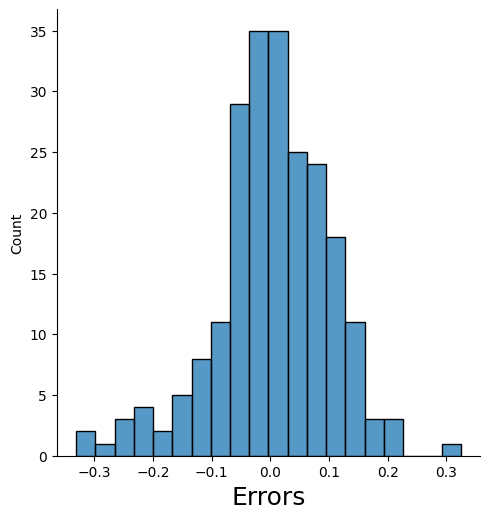

In [88]:
sns.displot(y_test-Y_test_predict,bins = 20)
plt.xlabel('Errors', fontsize = 18)   
plt.show

# Checking Homoscedasticity with test result 

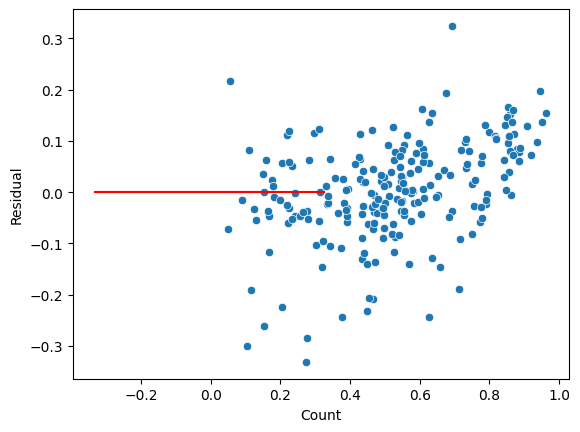

In [89]:
residual_test=y_test-Y_test_predict
sns.scatterplot(x=y_test,y=residual_test)
plt.plot(residual_test,(residual_test - residual_test), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


## y_test and y_pred  spread

Text(0, 0.5, 'Y_test_predict')

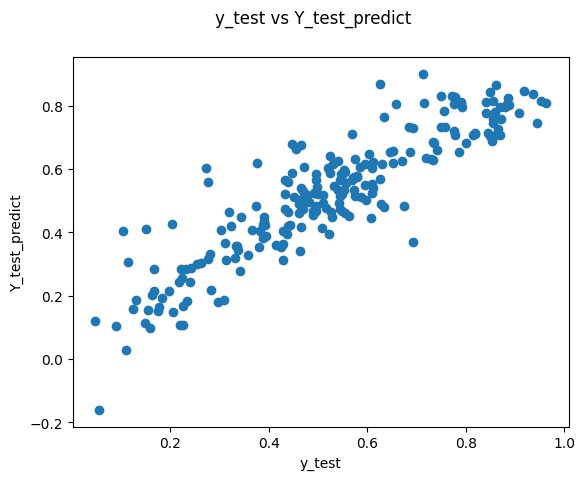

In [90]:
# Result accuracy prediction
fig = plt.figure()
plt.scatter(y_test, Y_test_predict)
fig.suptitle('y_test vs Y_test_predict') 
plt.xlabel('y_test')
plt.ylabel('Y_test_predict' ) 

## Result accuracy prediction

## Calculation of R2_test and Adj_R2_test for test result 

In [91]:
r2_test = r2_score(y_test, Y_test_predict)
Adjusted_R2_test = 1-((1-r2)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
r2_test  , Adjusted_R2_test

(0.8050495669880955, 0.8188325376407968)

In [92]:
print("Adjusted_R2_test is ", Adjusted_R2_test  )
print("Adjusted_R2_train is ", Adjusted_R2  )

Adjusted_R2_test is  0.8188325376407968
Adjusted_R2_train is  0.8383773323669708


In [93]:
print("R2_Test is ", r2_test  )
print("R2_train is ", r2  )

R2_Test is  0.8050495669880955
R2_train is  0.8428227495513763
